In [1]:
!pip3 install keras
!pip3 install ann_visualizer
!apt install graphviz
!apt-get install xdg-utils
!pip install h5py
!pip install pydot

'\n!pip3 install keras\n!pip3 install ann_visualizer\n!pip install graphviz\n!pip install h5py\n!pip install pydot\n'

In [2]:
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D,Dropout
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
trdata = ImageDataGenerator()
import os; print(os.getcwd())
traindata = trdata.flow_from_directory(directory="Source_1/Train",target_size=(384,384))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="Source_1/Test", target_size=(384,384))

/home/rifas/P5_Hackathon/Training
Found 382 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [4]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=12, input_shape=(300,300,3), kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(Conv2D(filters=12, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(Conv2D(filters=28, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(Conv2D(filters=28, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
# Max Pooling
model.add(MaxPool2D(pool_size=(32,32), strides=(2,2), padding="valid"))
model.add(MaxPool2D(pool_size=(16,16), strides=(2,2), padding="valid"))
model.add(MaxPool2D(pool_size=(8,8), strides=(2,2), padding="valid"))

model.add(Flatten())
model.add(Dense(units = 288, activation = "relu"))
model.add(Dropout(0.2, input_shape=(64,)))
model.add(Dense(units = 2, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 12)      336       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 12)      1308      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 300, 300, 28)      3052      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 300, 300, 28)      7084      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 135, 135, 28)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 28)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 28)        0

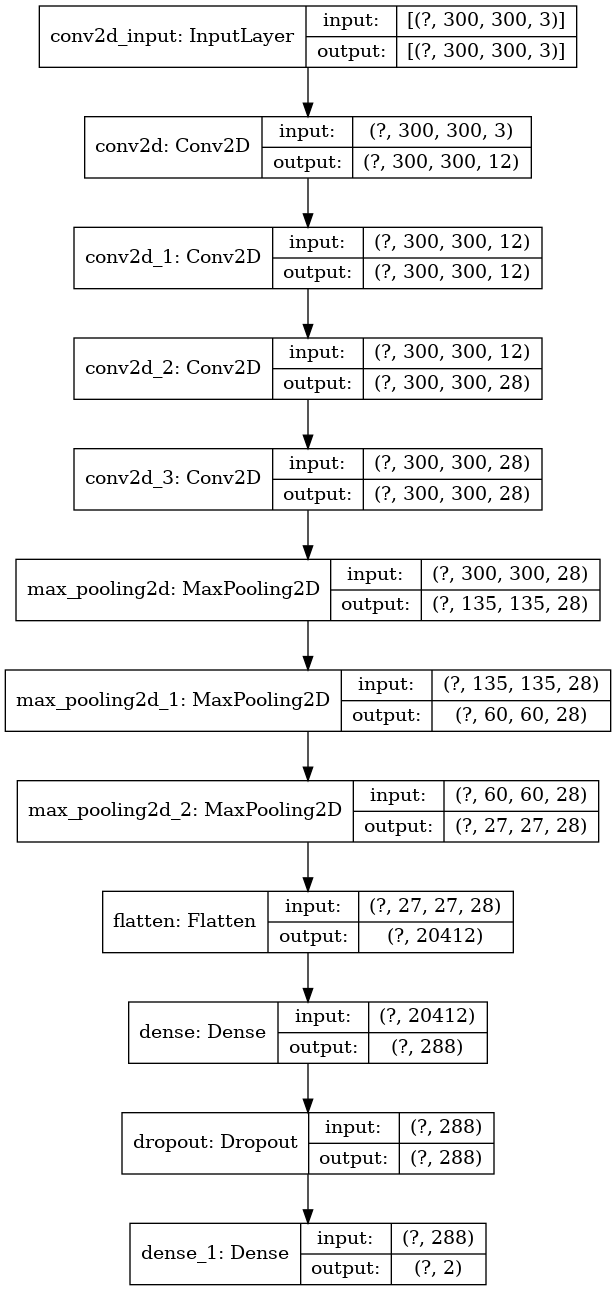

In [5]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [6]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("../P5_Hackathon/tahiti.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=16,callbacks=[checkpoint,early])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/16


InvalidArgumentError:  Input to reshape is a tensor with 1226624 values, but the requested shape requires a multiple of 20412
	 [[node sequential/flatten/Reshape (defined at <ipython-input-7-ffe5e71bbbcf>:4) ]] [Op:__inference_train_function_1022]

Function call stack:
train_function


In [ ]:
model.save("../P5_Hackathon/tahiti.h5")

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.preprocessing import image
img = image.load_img("Source_1/Negative.jpeg",target_size=(384,384))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("../P5_Hackathon/tahiti.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Positive")
else:
    print('Negative')

In [ ]:
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
# redefine model to output right after the first hidden layer
ixs = [1, 2, 3, 4, 5,6]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('Source_1/Positive.jpg', target_size=(384, 384))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 1
for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
        ix += 1
    pyplot.show()

In [ ]:
from keras.preprocessing import image
import os
positive = 0
negative = 0
saved_model = load_model("../P5_Hackathon/tahiti.h5")
for dirname, _, filenames in os.walk('Source_1/Test/'):
    for filename in filenames:
        img = image.load_img(os.path.join(dirname, filename),target_size=(300,300))
        img = np.asarray(img)
        img = np.expand_dims(img, axis=0)
        output = saved_model.predict(img)
        if output[0][0] > output[0][1]:
          print("Positive")
          positive+=1
        else:
          print('Negative')
          negative += 1
print("Total Positive Predicted ->",positive)
print("Total Negative Predicted ->",negative)

In [ ]:
from keras.models import load_model
pos = 0
neg = 0
saved_model = load_model("../P5_Hackathon/tahiti.h5")
for dirname, _, filenames in os.walk('Source_2/NonAugmentedTrain/Normal/'):
    for filename in filenames:
        img = image.load_img(os.path.join(dirname, filename),target_size=(300,300))
        img = np.asarray(img)
        img = np.expand_dims(img, axis=0)
        output = saved_model.predict(img)
        if output[0][0] > output[0][1]:
            print("Positive")
            pos+=1
        else:
            print('Negative')
            neg+=1
print("Total Positive Predicted ->",pos)
print("Total Negative Predicted ->",neg)

In [ ]:
pos1 = 0
neg1 = 0
saved_model = load_model("../P5_Hackathon/tahiti.h5")
for dirname, _, filenames in os.walk('Source_2/NonAugmentedTrain/COVID-19/'):
    for filename in filenames:
        img = image.load_img(os.path.join(dirname, filename),target_size=(300,300))
        img = np.asarray(img)
        img = np.expand_dims(img, axis=0)
        output = saved_model.predict(img)
        if output[0][0] > output[0][1]:
            print("Positive")
            pos1+=1
        else:
            print('Negative')
            neg1+=1
print("Total Positive Predicted ->",pos1)
print("Total Negative Predicted ->",neg1)

In [10]:
from ann_visualizer.visualize import ann_viz;

model.load_weights("../P5_Hackathon/Main_one.h5")
ann_viz(model, title="Model Visualization")